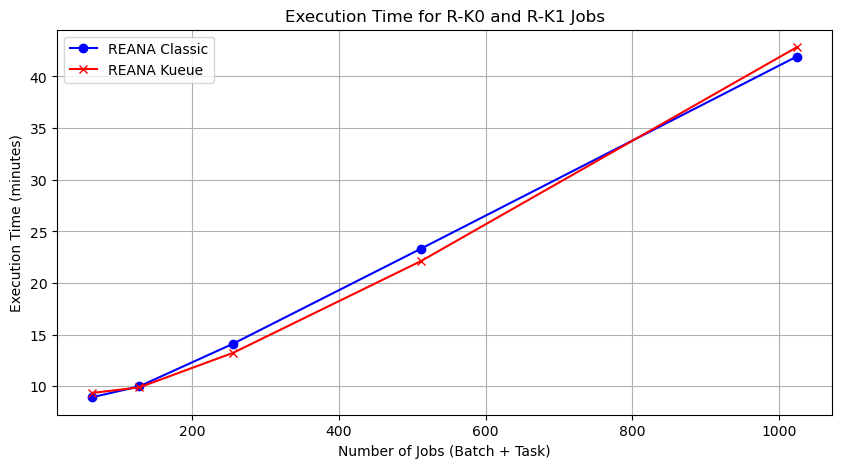

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

# Define the data
data = [
    {
        "batch_jobs": 1,
        "task_jobs": 63,
        "K0": {"created": "01:16:55", "finished": "01:25:52"},
        "K1": {"created": "22:37:16", "finished": "22:46:38"}
    },
    {
        "batch_jobs": 2,
        "task_jobs": 126,
        "K0": {"created": "01:31:43", "finished": "01:41:43"},
        "K1": {"created": "22:52:01", "finished": "23:01:55"}
    },
    {
        "batch_jobs": 4,
        "task_jobs": 252,
        "K0": {"created": "01:47:33", "finished": "02:01:41"},
        "K1": {"created": "23:06:55", "finished": "23:20:10"}
    },
    {
        "batch_jobs": 8,
        "task_jobs": 504,
        "K0": {"created": "02:36:01", "finished": "02:59:21"},
        "K1": {"created": "23:27:15", "finished": "23:49:23"}  
    },
    {
        "batch_jobs": 16,
        "task_jobs": 1008,
        "K0": {"created": "03:06:51", "finished": "03:48:47"},
        "K1": {"created": "22:55:11", "finished": "23:38:01"}  
    }
]

# Function to calculate the time difference in minutes
def calculate_execution_time(created, finished):
    fmt = '%H:%M:%S'
    created_dt = datetime.strptime(created, fmt)
    finished_dt = datetime.strptime(finished, fmt)
    return (finished_dt - created_dt).total_seconds() / 60

# Lists to store the number of jobs and their corresponding execution times for K0 and K1
jobs_K0 = []
execution_times_K0 = []

jobs_K1 = []
execution_times_K1 = []

# Process the data
for entry in data:
    total_jobs = entry["batch_jobs"] + entry["task_jobs"]
    
    # Process K0 jobs
    if entry["K0"]["finished"]:  # Ignore unfinished jobs
        execution_time_K0 = calculate_execution_time(entry["K0"]["created"], entry["K0"]["finished"])
        jobs_K0.append(total_jobs)
        execution_times_K0.append(execution_time_K0)
    
    # Process K1 jobs
    if entry["K1"]["finished"]:  # Ignore unfinished jobs
        execution_time_K1 = calculate_execution_time(entry["K1"]["created"], entry["K1"]["finished"])
        jobs_K1.append(total_jobs)
        execution_times_K1.append(execution_time_K1)

# Plot the data for K0 and K1 on the same graph
plt.figure(figsize=(10, 5))
plt.plot(jobs_K0, execution_times_K0, marker='o', linestyle='-', color='b', label='REANA Classic')
plt.plot(jobs_K1, execution_times_K1, marker='x', linestyle='-', color='r', label='REANA Kueue')
plt.xlabel('Number of Jobs (Batch + Task)')
plt.ylabel('Execution Time (minutes)')
plt.title('Execution Time for R-K0 and R-K1 Jobs')
plt.legend()
plt.grid(True)
plt.show()
